In [1]:
%matplotlib inline
# disable autoreload for global dataset
# %load_ext autoreload
# %autoreload 2

In [2]:
from learn import *

In [3]:
num_gpus = 1
gpu_start = 0
num_workers = 3 * num_gpus
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)

bs = 35 * num_gpus

## Test py file

In [4]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, debug=False, global_dataset=True)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=2695), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=1156), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


In [5]:
%%time
lr = 1e-5
lrs = np.array([lr/3, lr])
wd = 0.025
wds = [wd/3, wd]
train_and_plot(learn, 1, 'vegas', lrs=lrs, n_cycles=2, wds=wds, use_wd_sched=False, cycle_len=1, cycle_mult=2, best_save_name='autosaved_2')

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   jaccard_coef_parallel       
    0      0.769815   0.792382   2e-06     


KeyboardInterrupt: 

In [ ]:
train_on_full_dataset(1, lrs, wds, sequential=False, use_wd_sched=False, save_starter='full_dataset_in_0')

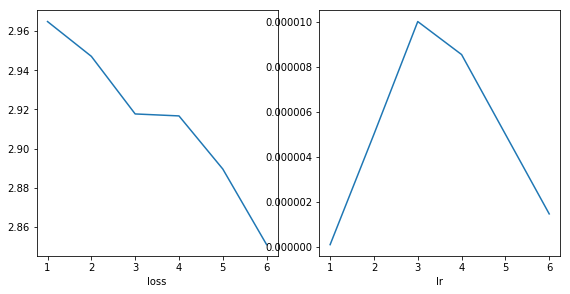

In [28]:
plot_lr_loss(learn)

## Plot predictions

In [31]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, debug=False)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=2695), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=1156), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


In [32]:
learn.load('vegas_1')

### Get test set

In [33]:
learn.data.val_ds.get_n()

10404

In [34]:
n_ims = 10
x, y = learn.data.val_dl.get_batch(range(5000, 5000 + n_ims))

In [46]:
preds = learn.predict_array(x).squeeze()

In [47]:
x.shape, y.shape, preds.shape

((10, 3, 256, 256), (10, 256, 256), (10, 256, 256))

In [50]:
ious = sep_iou(preds.squeeze(), y, 0.5)
ious.shape

(10,)

In [57]:
threshs = np.linspace(0, 1, 50)
mean_iou = [jaccard_coef_parallel(preds.squeeze(), y, th) for th in threshs]

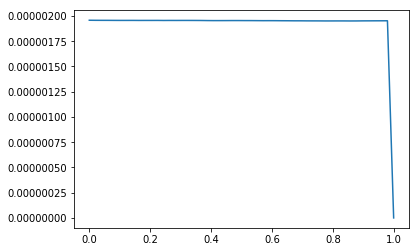

In [58]:
plt.plot(threshs, mean_iou)

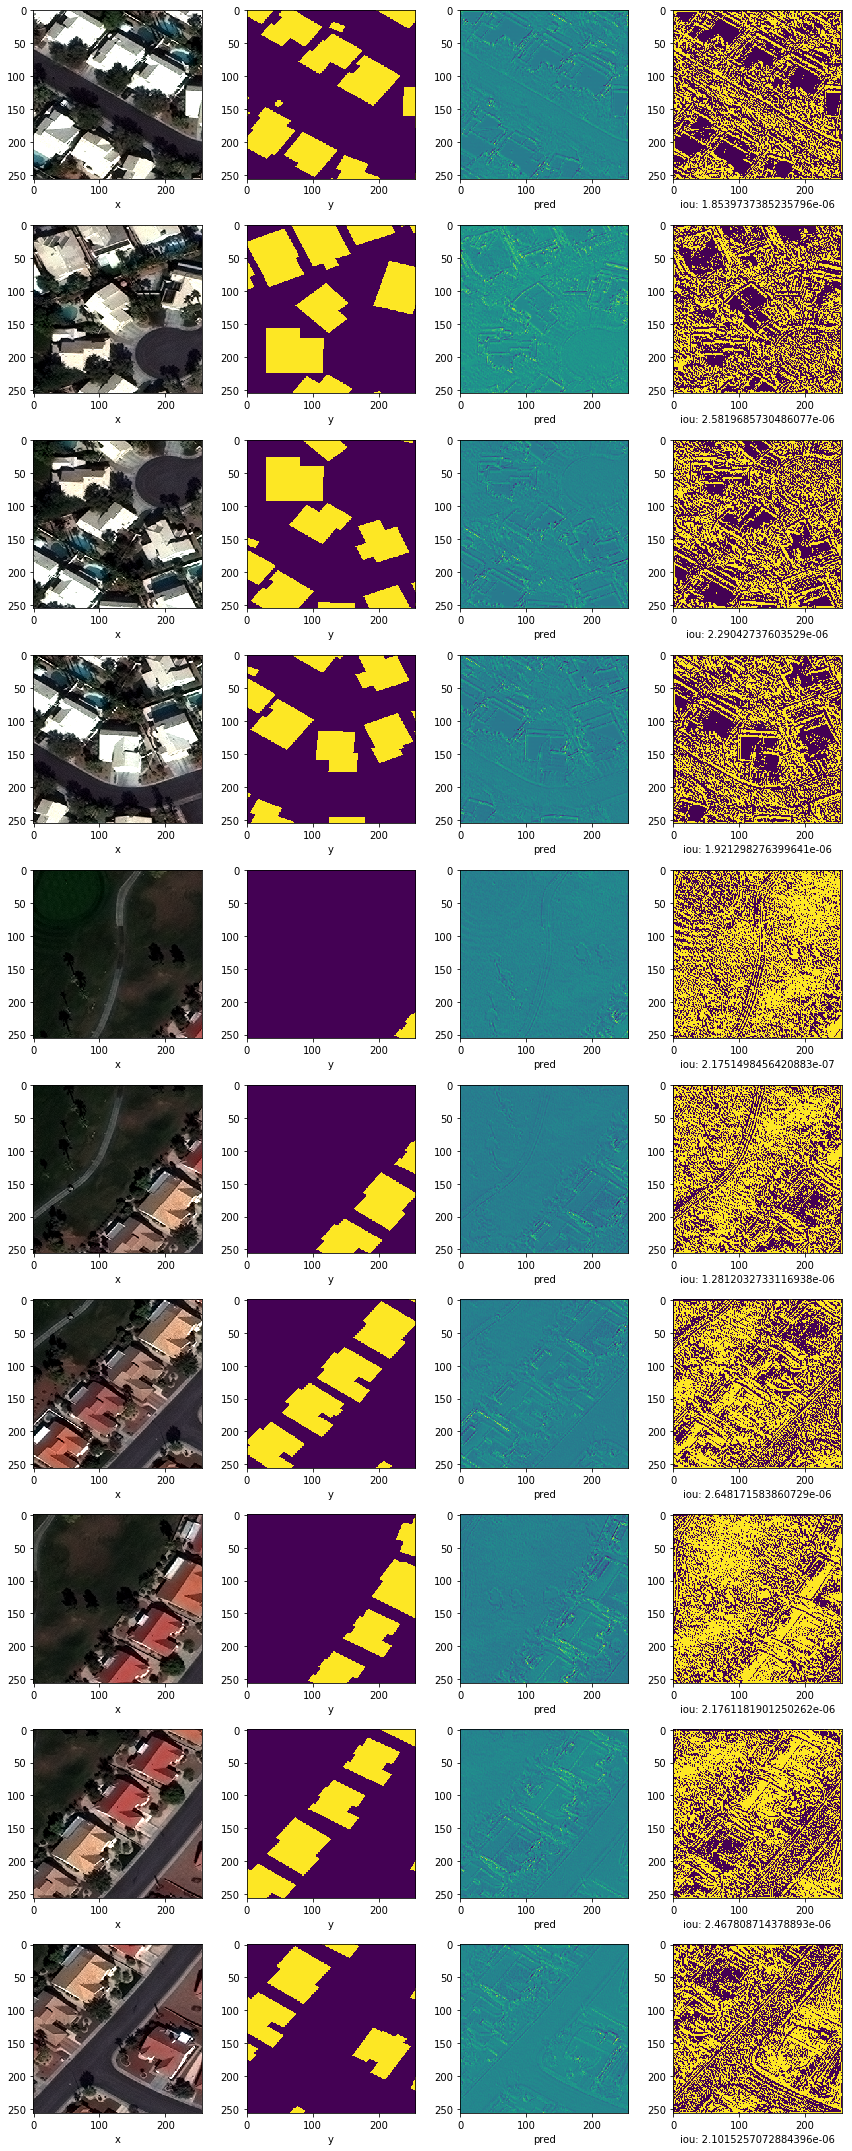

In [63]:
cols = 4
fig, ax = plt.subplots(n_ims, cols, figsize=(3 * cols, 3 * n_ims))
fig.tight_layout()
ious = sep_iou(preds.squeeze(), y)
for i in range(n_ims):
    ax[i][0].imshow(denorm(x[i]).squeeze())
    ax[i][0].set_xlabel('x')
    ax[i][1].imshow(y[i].squeeze())
    ax[i][1].set_xlabel('y')
    ax[i][2].imshow(preds[i].squeeze())
    ax[i][2].set_xlabel('pred')
    iou = ious[i]
    ax[i][3].imshow(bool_pred(preds[i].squeeze()))
    ax[i][3].set_xlabel('iou: ' + str(ious[i]))

In [4]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, 
                                         model_name='deeplab', debug=True)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=2695), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=1156), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


In [5]:
c = children(learn.model.module)

In [6]:
len(c)

2

In [15]:
c1 = children(c[0])

In [12]:
list(enumerate(c1))

[]

In [15]:
list(enumerate(c[1]))

TypeError: 'UpsamplingBilinear2d' object is not iterable